# Resolução de exercicios - Classificação de textos com spacy
* If 0 Negative label 
* If 1 Positive label

In [1]:
import pandas as pd
import numpy as np
import random
import spacy
import seaborn as sns
import string
import re

In [2]:
base_treinamento = pd.read_csv('../Dados/Bases_de_dados/Twitter/Train50.csv', delimiter = ';')
base_treinamento 

,id,tweet_text,tweet_date,sentiment,query_used
0,1050785521201541121,@Laranjito76 A pessoa certa para isso seria o ...,Fri Oct 12 16:29:25 +0000 2018,1,:)
1,1050785431955140608,"@behin_d_curtain Para mim, é precisamente o co...",Fri Oct 12 16:29:04 +0000 2018,1,:)
2,1050785401248645120,Vou fazer um video hoje... estou pensando em f...,Fri Oct 12 16:28:56 +0000 2018,1,:)
3,1050785370982547461,"aaaaaaaa amei tanto essas polaroids, nem sei e...",Fri Oct 12 16:28:49 +0000 2018,1,:)
4,1050785368902131713,Valoriza o coração do menininho que vc tem. El...,Fri Oct 12 16:28:49 +0000 2018,1,:)
...,...,...,...,...,...
49995,1046762827053232128,:( é tão lindo que dói https://t.co/GqnpgyWWxB,Mon Oct 01 14:04:40 +0000 2018,0,:(
49996,1046762813362966529,"@veraluciarj Pois é.. tenho problema c/ ""coisa...",Mon Oct 01 14:04:37 +0000 2018,0,:(
49997,1046762806392082432,eu te amo tanto minja vidinha meu bem mais pre...,Mon Oct 01 14:04:35 +0000 2018,0,:(
49998,1046762752071618560,@itsLary @jessboluda Pfvor :(,Mon Oct 01 14:04:22 +0000 2018,0,:(


In [3]:
base_treinamento.shape

(50000, 5)

In [4]:
base_treinamento.isnull().sum()

id            0
tweet_text    0
tweet_date    0
sentiment     0
query_used    0
dtype: int64

In [5]:
base_treinamento .head()

,id,tweet_text,tweet_date,sentiment,query_used
0,1050785521201541121,@Laranjito76 A pessoa certa para isso seria o ...,Fri Oct 12 16:29:25 +0000 2018,1,:)
1,1050785431955140608,"@behin_d_curtain Para mim, é precisamente o co...",Fri Oct 12 16:29:04 +0000 2018,1,:)
2,1050785401248645120,Vou fazer um video hoje... estou pensando em f...,Fri Oct 12 16:28:56 +0000 2018,1,:)
3,1050785370982547461,"aaaaaaaa amei tanto essas polaroids, nem sei e...",Fri Oct 12 16:28:49 +0000 2018,1,:)
4,1050785368902131713,Valoriza o coração do menininho que vc tem. El...,Fri Oct 12 16:28:49 +0000 2018,1,:)


C:\Users\leone\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


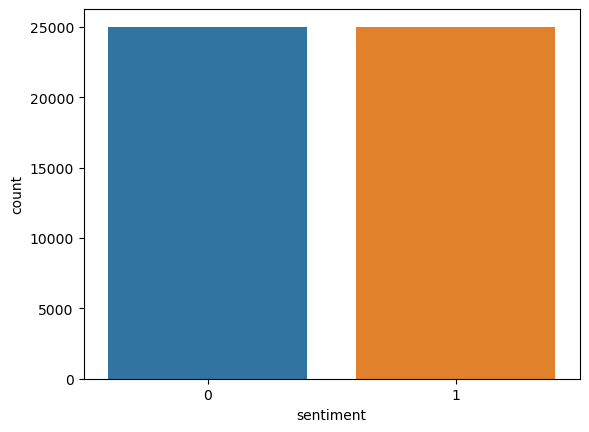

In [6]:
sns.countplot(base_treinamento['sentiment'], label = 'Contagem');

In [7]:
# ELIMINAR ATRIBUTOS DA BASE DE DADOS 
base_treinamento.drop(['id', 'tweet_date', 'query_used'], axis = 1, inplace=True)

In [8]:
base_train = base_treinamento.head()
base_train

,tweet_text,sentiment
0,@Laranjito76 A pessoa certa para isso seria o ...,1
1,"@behin_d_curtain Para mim, é precisamente o co...",1
2,Vou fazer um video hoje... estou pensando em f...,1
3,"aaaaaaaa amei tanto essas polaroids, nem sei e...",1
4,Valoriza o coração do menininho que vc tem. El...,1


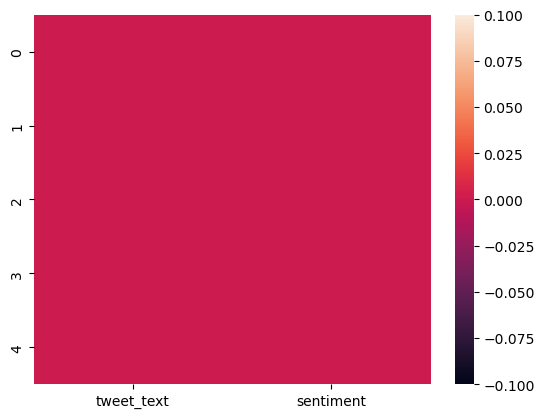

In [9]:
sns.heatmap(pd.isnull(base_train));

# Pre-processamento
* Conversao de maiusculas para minusculas
* Retirada de nomes com simbolos e URLs (stop words)
* Espacos em branco
* Emoticons
* Lematizacao
* Retirada de Pontuacoes

In [10]:
pln = spacy.load('pt_core_news_sm')
pln

C:\Users\leone\Anaconda3\lib\site-packages\spacy\util.py:877: UserWarning: [W095] Model 'pt_core_news_sm' (3.4.0) was trained with spaCy v3.4 and may not be 100% compatible with the current version (3.5.0). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [11]:
stop_words = spacy.lang.pt.stop_words.STOP_WORDS

In [12]:
# Letras minusculas
def preprocessamento(texto): 
    texto = texto.lower()
    texto = re.sub(r"@[A-Za-z0-9$-_@.&+]+", ' ', texto) # Limpar nomes com caracteres simbolocicos
    texto = re.sub(r"https?://[A-Za-z0-9./]+", ' ', texto)# Limpar urls
    texto = re.sub(r" +", ' ', texto)#Limpar espacos em branco
    lista_emocoes = {':)': 'emocaopositiva', 
                    ':d': 'emocaopositiva',
                    ':(': 'emocaonegativa'}
    for emocao in lista_emocoes:
        texto = texto.replace(emocao, lista_emocoes[emocao])
    # lEMATIZACAO
    documento = pln(texto)
    
    lista = []
    for token in documento:
        lista.append(token.lemma_)
    #STOP_WORDS
    lista = [palavra for palavra in lista if palavra not in stop_words and palavra not in string.punctuation]
    lista = ''.join([str(elemento) for elemento in lista if not elemento.isdigit()])
    return lista

In [13]:
base_train.head(10)

,tweet_text,sentiment
0,@Laranjito76 A pessoa certa para isso seria o ...,1
1,"@behin_d_curtain Para mim, é precisamente o co...",1
2,Vou fazer um video hoje... estou pensando em f...,1
3,"aaaaaaaa amei tanto essas polaroids, nem sei e...",1
4,Valoriza o coração do menininho que vc tem. El...,1


In [14]:
base_train['tweet_text'] = base_train['tweet_text'].apply(preprocessamento)

C:\Users\leone\AppData\Local\Temp\ipykernel_13964\1489068313.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_train['tweet_text'] = base_train['tweet_text'].apply(preprocessamento)


In [15]:
base_train.head(10)

,tweet_text,sentiment
0,pessoacertovaleazevedoemocaopositivo,1
1,precisamentecontrárioemocaopositivovirchuvavi...,1
2,videohoje...pensarfalarmetade ocsgopaginaalgui...,1
3,aaaaaaaarameirpolaroidsexpressartoapaixonarvdd...,1
4,valorizarcoraçãode omenininhoelvcdiferentesorr...,1


# Base de teste

In [16]:
base_test = pd.read_csv('../Dados/Bases_de_dados/Twitter/Test.csv', delimiter = ';')
base_test

,id,tweet_text,tweet_date,sentiment,query_used
0,1029536486021099522,@Gazo1a Nossa! Muito obrigada :),Wed Aug 15 01:13:20 +0000 2018,1,:)
1,1029536496368406528,@BerzGamer vai pa puta que te pariu :),Wed Aug 15 01:13:23 +0000 2018,1,:)
2,1029536531655131137,QUER MAIS DESCONTOS? (14/08) ⭐⭐⭐⭐⭐ 🌐 Confira n...,Wed Aug 15 01:13:31 +0000 2018,1,:)
3,1029536560117678081,"EU VOU PEGAR VCS, ME AJUDEM GALERA, PELO AMOR ...",Wed Aug 15 01:13:38 +0000 2018,1,:)
4,1029536605852377088,Estávamos em casa do Zé e eu estava a morrer d...,Wed Aug 15 01:13:49 +0000 2018,1,:)
...,...,...,...,...,...
4995,1030528364145201153,@ol_cdanilo parece livro de autoajuda :(,Fri Aug 17 18:54:42 +0000 2018,0,:(
4996,1030528418235015168,@tatazoquita aaaaa sinto muito :((,Fri Aug 17 18:54:55 +0000 2018,0,:(
4997,1030528446122930176,To começando a sentir dor de novo e meu irmão ...,Fri Aug 17 18:55:02 +0000 2018,0,:(
4998,1030528453752352769,@ichbintw parece que no dia que toma a vacina ...,Fri Aug 17 18:55:04 +0000 2018,0,:(


In [17]:
base_test.isnull().sum(), base_test.shape

(id            0
 tweet_text    0
 tweet_date    0
 sentiment     0
 query_used    0
 dtype: int64,
 (5000, 5))

In [18]:
base_test.head(10)

,id,tweet_text,tweet_date,sentiment,query_used
0,1029536486021099522,@Gazo1a Nossa! Muito obrigada :),Wed Aug 15 01:13:20 +0000 2018,1,:)
1,1029536496368406528,@BerzGamer vai pa puta que te pariu :),Wed Aug 15 01:13:23 +0000 2018,1,:)
2,1029536531655131137,QUER MAIS DESCONTOS? (14/08) ⭐⭐⭐⭐⭐ 🌐 Confira n...,Wed Aug 15 01:13:31 +0000 2018,1,:)
3,1029536560117678081,"EU VOU PEGAR VCS, ME AJUDEM GALERA, PELO AMOR ...",Wed Aug 15 01:13:38 +0000 2018,1,:)
4,1029536605852377088,Estávamos em casa do Zé e eu estava a morrer d...,Wed Aug 15 01:13:49 +0000 2018,1,:)
5,1029536620368863234,Precisa :) https://t.co/DcLGDHbjT0,Wed Aug 15 01:13:52 +0000 2018,1,:)
6,1029536626656129024,@Jeniabreu07 mas por acaso adoro beijos e abra...,Wed Aug 15 01:13:54 +0000 2018,1,:)
7,1029536638140141569,Solteiro s sozinho sempre :),Wed Aug 15 01:13:57 +0000 2018,1,:)
8,1029536643500462080,Lindezas Cortador kit Mário coleção Bia Cravol...,Wed Aug 15 01:13:58 +0000 2018,1,:)
9,1029536659388424192,@otphurts Claro que sim :)),Wed Aug 15 01:14:02 +0000 2018,1,:)


In [19]:
base_test['tweet_text'] = base_test['tweet_text'].apply(preprocessamento)

In [20]:
base_test.head(10)

,id,tweet_text,tweet_date,sentiment,query_used
0,1029536486021099522,emocaopositivo,Wed Aug 15 01:13:20 +0000 2018,1,:)
1,1029536496368406528,paputapariremocaopositivo,Wed Aug 15 01:13:23 +0000 2018,1,:)
2,1029536531655131137,quererdesconto14/08⭐⭐⭐⭐⭐🌐confirarem olink➔»com...,Wed Aug 15 01:13:31 +0000 2018,1,:)
3,1029536560117678081,vcsajudargalerapor oamorbuteraemocaopositivomm...,Wed Aug 15 01:13:38 +0000 2018,1,:)
4,1029536605852377088,casade ozémorrersonochegarcasaficosonoemocaopo...,Wed Aug 15 01:13:49 +0000 2018,1,:)
5,1029536620368863234,precisaremocaopositivo,Wed Aug 15 01:13:52 +0000 2018,1,:)
6,1029536626656129024,acasoadorarbeijoabraçohahahahahabuefofiiiahah...,Wed Aug 15 01:13:54 +0000 2018,1,:)
7,1029536638140141569,solteirossozinhoemocaopositivo,Wed Aug 15 01:13:57 +0000 2018,1,:)
8,1029536643500462080,lindezacortadorkitMáriocoleçãobercravolcadastr...,Wed Aug 15 01:13:58 +0000 2018,1,:)
9,1029536659388424192,claroemocaopositivo,Wed Aug 15 01:14:02 +0000 2018,1,:)


# Tratamento da classe

In [21]:
exemplo_base_dados = [["este trabalho eh agradavel", {"POSITIVO": True, "NEGATIVO": False}],
                     ["Este lugar continua assustador", {"PORITIVO": False, "NEGAIVO": True}]]

In [22]:
# TREINAMENTO FINAL
base_final = []
for texto, emocao in zip(base_train['tweet_text'], base_train['sentiment']):
    if emocao == 1:
        dic = ({'POSITIVO': True, 'NEGATIVO': False })
    elif emocao == 0:
        dic = ({'POSITIVO': False, 'NEGATIVO': True})
        base_final.append([texto, dic.copy()])

In [23]:
  len(base_final)

0

In [24]:
base_final[10:15]

[]

In [ ]:
# TESTE NEGATIVOS 
base_test['tweet_text'][4000]

# GUARDAR O MODELO

In [26]:
modelo.to_disk('modelo_sent')